In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from matplotlib import rc
rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False

In [2]:
import os 
os.chdir('/Users/kimmh/Desktop/서데캠/')
os.getcwd()

'/Users/kimmh/Desktop/서데캠'

#### 데이터 불러오고 년월 문자열로

In [3]:
dt = pd.read_table('./data/TN_TR_OWT_CAR_REGIST_processed.txt',sep=',')
dt['`regist_ym`'] = dt['`regist_ym`'].astype(str)
dt.columns = ['regist_ym', 'fuel_kind', 'vhcle_kind', 'vhcle_prpos', 'cnt']
dt.head()

,regist_ym,fuel_kind,vhcle_kind,vhcle_prpos,cnt
0,201710,휘발유,승용,비사업용,1581362
1,201710,휘발유,승용,사업용,19134
2,201710,휘발유,승합,비사업용,1060
3,201710,휘발유,승합,사업용,48
4,201710,휘발유,화물,비사업용,1716


#### 자료형 확인 

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5808 entries, 0 to 5807
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   regist_ym    5808 non-null   object
 1   fuel_kind    5808 non-null   object
 2   vhcle_kind   5808 non-null   object
 3   vhcle_prpos  5808 non-null   object
 4   cnt          5808 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 227.0+ KB


#### 연도별 추세 (7월만 추출)

In [5]:
dt = dt[dt.regist_ym.str.contains(r'(07)')]
dt

/Users/kimmh/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,regist_ym,fuel_kind,vhcle_kind,vhcle_prpos,cnt
614,201607,휘발유,승용,비사업용,1579462
615,201607,휘발유,승용,사업용,18031
616,201607,휘발유,승합,비사업용,1190
617,201607,휘발유,승합,사업용,35
618,201607,휘발유,화물,비사업용,1643
...,...,...,...,...,...
5803,202107,기타연료,승합,사업용,0
5804,202107,기타연료,화물,비사업용,3547
5805,202107,기타연료,화물,사업용,1239
5806,202107,기타연료,특수,비사업용,489


In [6]:
dt.reset_index(drop=True, inplace=True)

#### 연도만 슬라이싱

In [7]:
dt['regist_ym'] = dt['regist_ym'].str.slice(start=0, stop=4)
dt.head()

,regist_ym,fuel_kind,vhcle_kind,vhcle_prpos,cnt
0,2016,휘발유,승용,비사업용,1579462
1,2016,휘발유,승용,사업용,18031
2,2016,휘발유,승합,비사업용,1190
3,2016,휘발유,승합,사업용,35
4,2016,휘발유,화물,비사업용,1643


2016 ~ 2021 6년

#### 하이브리드 통합 

In [8]:
dt['fuel_kind'].value_counts()

경유               48
휘발유              48
CNG              48
하이브리드(경유+전기)     48
기타연료             48
하이브리드(CNG+전기)    48
하이브리드(LPG+전기)    48
수소               48
엘피지              48
하이브리드(휘발유+전기)    48
전기               48
Name: fuel_kind, dtype: int64

In [9]:
dt['fuel_kind'] = dt['fuel_kind'].str.slice(start=0, stop=5)
dt['fuel_kind'].value_counts()

하이브리드    192
경유        48
휘발유       48
CNG       48
기타연료      48
수소        48
엘피지       48
전기        48
Name: fuel_kind, dtype: int64

연료 11종류에서 8가지로 축소

In [10]:
dt

,regist_ym,fuel_kind,vhcle_kind,vhcle_prpos,cnt
0,2016,휘발유,승용,비사업용,1579462
1,2016,휘발유,승용,사업용,18031
2,2016,휘발유,승합,비사업용,1190
3,2016,휘발유,승합,사업용,35
4,2016,휘발유,화물,비사업용,1643
...,...,...,...,...,...
523,2021,기타연료,승합,사업용,0
524,2021,기타연료,화물,비사업용,3547
525,2021,기타연료,화물,사업용,1239
526,2021,기타연료,특수,비사업용,489


### df : 연도별 7월 차량등록 현황

In [11]:
data = dt.groupby(['regist_ym', 'fuel_kind'])
df = data.sum('cnt')
df = df.reset_index()
df

,regist_ym,fuel_kind,cnt
0,2016,CNG,9908
1,2016,경유,1096423
2,2016,기타연료,4562
3,2016,수소,12
4,2016,엘피지,326945
5,2016,전기,1207
6,2016,하이브리드,40487
7,2016,휘발유,1600382
8,2017,CNG,9793
9,2017,경유,1128072


In [12]:
df[df['fuel_kind']=='전기']  # 확연한 증가 추세 

,regist_ym,fuel_kind,cnt
5,2016,전기,1207
13,2017,전기,2678
21,2018,전기,6942
29,2019,전기,11764
37,2020,전기,20003
45,2021,전기,29325


In [13]:
df[df['fuel_kind']=='하이브리드']

,regist_ym,fuel_kind,cnt
6,2016,하이브리드,40487
14,2017,하이브리드,52734
22,2018,하이브리드,67682
30,2019,하이브리드,85363
38,2020,하이브리드,102510
46,2021,하이브리드,130930


In [14]:
df[df['fuel_kind']=='경유']  # 감소하는 듯

,regist_ym,fuel_kind,cnt
1,2016,경유,1096423
9,2017,경유,1128072
17,2018,경유,1145341
25,2019,경유,1133237
33,2020,경유,1113145
41,2021,경유,1097562


In [15]:
df['fuel_kind'].value_counts()

휘발유      6
경유       6
전기       6
하이브리드    6
수소       6
CNG      6
엘피지      6
기타연료     6
Name: fuel_kind, dtype: int64

### 연도별 / 연료별 서울시 차량등록현황 플랏

In [16]:
H = df[df['fuel_kind']=='수소']
cng = df[df['fuel_kind']=='CNG']
etc = df[df['fuel_kind']=='기타연료']
elec = df[df['fuel_kind']=='전기']
hwi = df[df['fuel_kind']=='휘발유']
hybrid = df[df['fuel_kind']=='하이브리드']
lpg = df[df['fuel_kind']=='엘피지']
gyeo = df[df['fuel_kind']=='경유']

In [17]:
H.index

Int64Index([3, 11, 19, 27, 35, 43], dtype='int64')

In [18]:
def stackk(a): 
    lst = []
    lst.append(a.index[0])
    for i in range(1, 6):
        lst.append(a.index[0]+9*i)
    return lst

In [25]:
idx = []

for i in range(2016, 2022):
    for j in [' CNG', ' 경유', ' 기타연료', ' 수소', ' 엘피지', ' 전기', ' 하이브리드', ' 휘발유']:
        idx.append(str(i)+j)

from itertools import repeat        

idx2 = []
for i in range(2016, 2022):
    idx2.append(str(i)+'년 (7월)')
    for j in list(repeat('',8)):
        idx2.append(j)

y_tick = ['','20만', '40만', '60만', '80만', '100만', '120만', '140만', '160만']

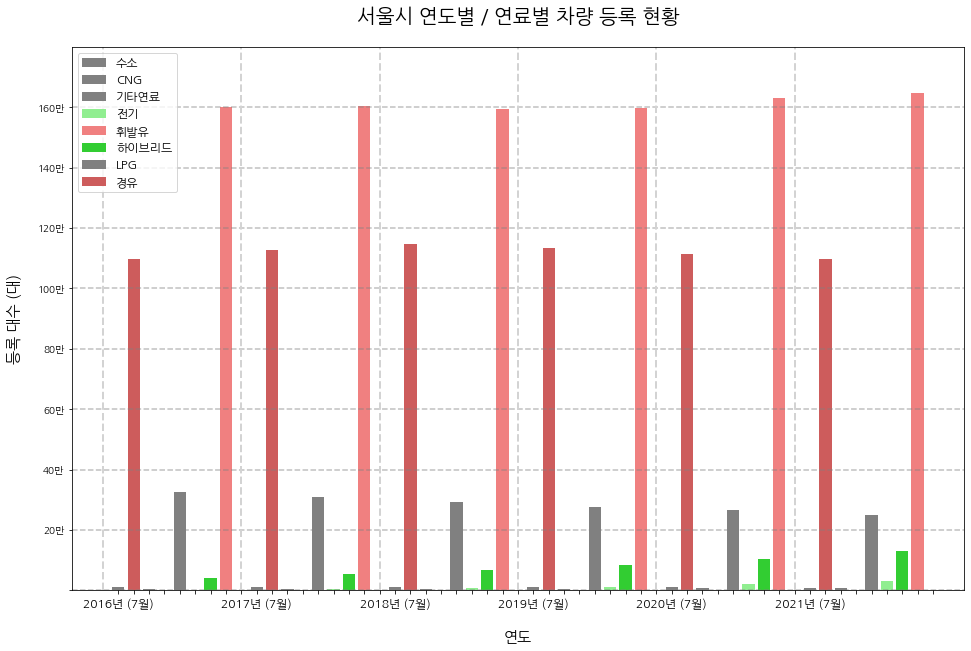

In [26]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.bar(stackk(H), H['cnt'], color = 'gray', label='수소')
ax.bar(stackk(cng), cng['cnt'], color = 'gray', label='CNG')
ax.bar(stackk(etc), etc['cnt'], color = 'gray', label='기타연료')
ax.bar(stackk(elec), elec['cnt'], color = 'lightgreen', label='전기')
ax.bar(stackk(hwi), hwi['cnt'], color = 'lightcoral', label='휘발유')
ax.bar(stackk(hybrid), hybrid['cnt'], color = 'limegreen', label='하이브리드')
ax.bar(stackk(lpg), lpg['cnt'], color = 'gray', label='LPG')
ax.bar(stackk(gyeo), gyeo['cnt'], color = 'indianred', label='경유')

ax.set_xticks(np.arange(54))
ax.set_xticklabels(idx2, size=12)

plt.axvline(-1, 0, 1650000, color='lightgray', linestyle='--', linewidth=2)
plt.axvline(8, 0, 1650000, color='lightgray', linestyle='--', linewidth=2)
plt.axvline(17, 0, 1650000, color='lightgray', linestyle='--', linewidth=2)
plt.axvline(26, 0, 1650000, color='lightgray', linestyle='--', linewidth=2)
plt.axvline(35, 0, 1650000, color='lightgray', linestyle='--', linewidth=2)
plt.axvline(44, 0, 1650000, color='lightgray', linestyle='--', linewidth=2)

ax.set_yticks(np.arange(0, 1800000, 200000))
ax.set_yticklabels(y_tick)

plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--', linewidth=1.5)

ax.set_ylim((0, 1800000))

ax.set_xlabel('연도', size=15, labelpad=20)
ax.set_ylabel('등록 대수 (대)', size=15, labelpad=15)
ax.set_title('서울시 연도별 / 연료별 차량 등록 현황', size=20, pad=25)
ax.legend(fontsize=12, loc='upper left')
plt.show()

### 연도별 전기차/하이브리드 

In [34]:
elec_index = [0, 2, 4, 6, 8, 10]
hybrid_index = [1, 3, 5, 7, 9, 11]

idx3 = []
for i in range(2016, 2022):
    idx3.append(str(i)+'년 (7월)')
    idx3.append('')

y_tick2 = ['', '2만', '4만', '6만', '8만', '10만', '12만', '14만']

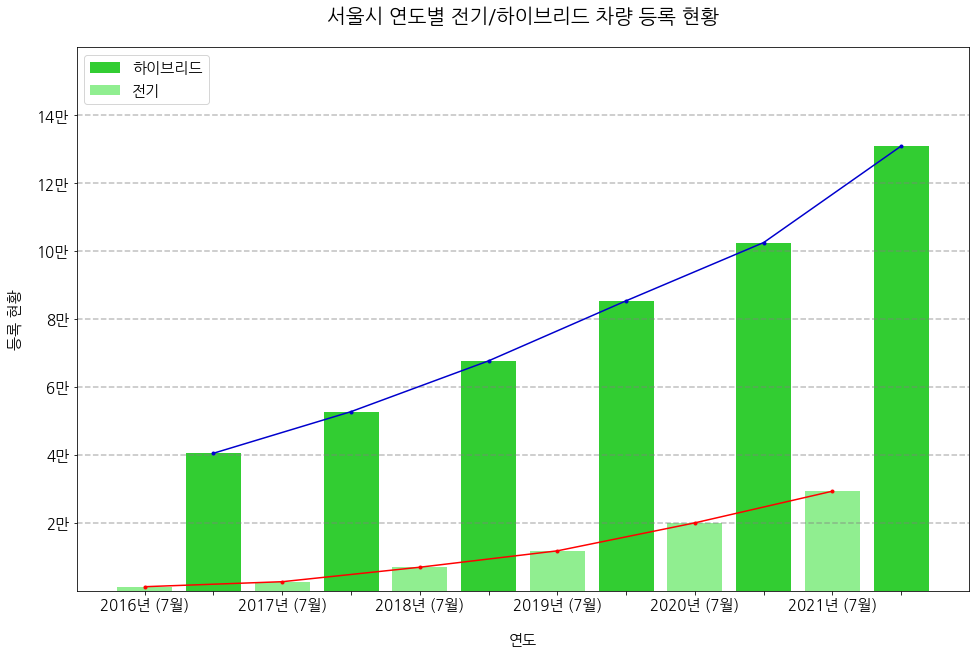

In [57]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.bar(hybrid_index, hybrid['cnt'], color = 'limegreen', label='하이브리드')
ax.bar(elec_index, elec['cnt'], color = 'lightgreen', label='전기')

ax.plot(hybrid_index, hybrid['cnt'], color = 'mediumblue', marker='.')
ax.plot(elec_index, elec['cnt'], color = 'red', marker='.')

ax.set_xticks(np.arange(12))
ax.set_xticklabels(idx3, size=15)

ax.set_yticks(np.arange(0, 160000, 20000))
ax.set_yticklabels(y_tick2, size=15)

ax.set_ylim((1, 160000))

plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--', linewidth=1.5)

ax.set_xlabel('연도', size=15, labelpad=20)
ax.set_ylabel('등록 현황', size=15, labelpad=15)
ax.set_title('서울시 연도별 전기/하이브리드 차량 등록 현황', size=20, pad=25)
ax.legend(fontsize=15, loc='upper left')
plt.show()

In [63]:
y_tick3 = ['', '2만', '4만', '6만', '8만', '10만', '12만', '14만', '16만']

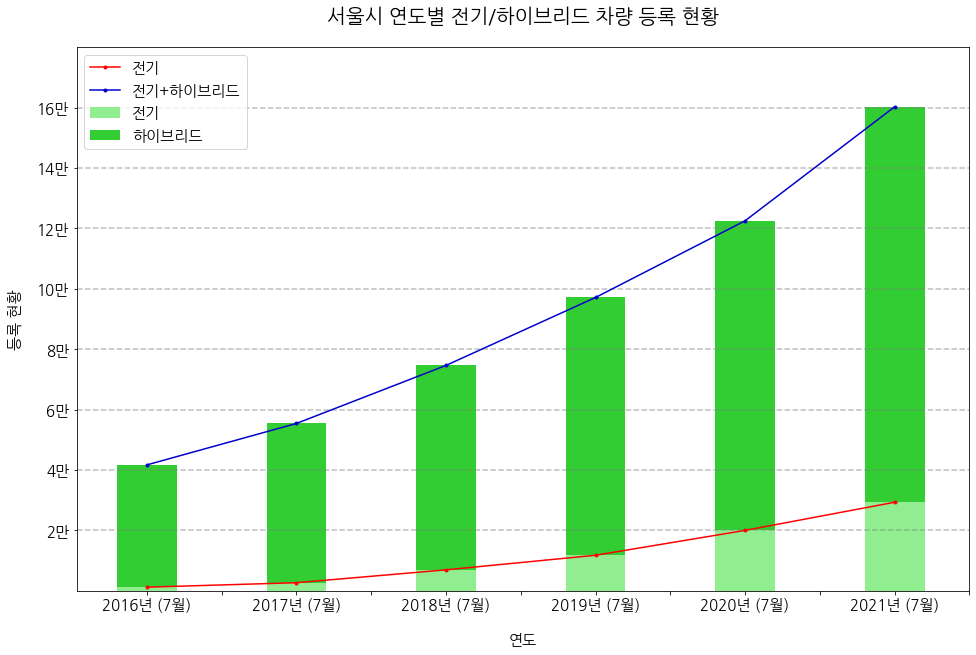

In [64]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.bar(elec_index, elec['cnt'], color = 'lightgreen', label='전기')
ax.bar(elec_index, hybrid['cnt'], bottom = elec['cnt'], color = 'limegreen', label='하이브리드')

ax.plot(elec_index, elec['cnt'], label = '전기', color = 'red', marker='.')
ax.plot(elec_index, 
        [elec['cnt'][i] + hybrid['cnt'][i+1] for i in [5,13,21,29,37,45]], 
        label = '전기+하이브리드', color = 'mediumblue', marker='.')

ax.set_xticks(np.arange(12))
ax.set_xticklabels(idx3, size=15)

ax.set_yticks(np.arange(0, 180000, 20000))
ax.set_yticklabels(y_tick3, size=15)

ax.set_ylim((1, 180000))

plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--', linewidth=1.5)

ax.set_xlabel('연도', size=15, labelpad=20)
ax.set_ylabel('등록 현황', size=15, labelpad=15)
ax.set_title('서울시 연도별 전기/하이브리드 차량 등록 현황', size=20, pad=25)
ax.legend(fontsize=15, loc='upper left')
plt.show()